Создаем графики и отображаем их

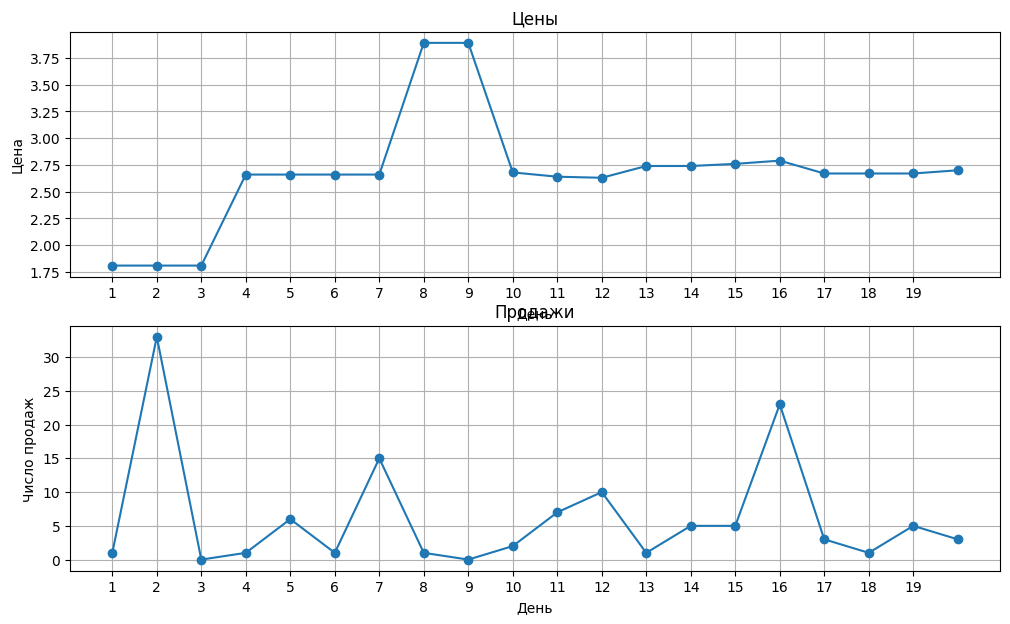

In [26]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# Example: Line Chart
with open("DataSet.csv", newline='\n') as fp:
    reader = csv.reader(fp, delimiter=';', )
    data = [row for row in reader]
    title = data[0]
    data = data[1:]

dates = [i for i in range(1, 21)]
prices = [float(row[1].replace(',', '.')) for row in data]
sales = [float(row[2].replace(',', '.')) for row in data]

fig, ax = plt.subplots(2, 1, figsize=(12, 7))

price_plot = ax[0]
price_plot.plot(dates, prices, marker='o', label='Цена')

price_plot.set_xlabel(title[0])
price_plot.set_ylabel(title[1])
price_plot.set_title('Цены')
price_plot.set_xticks(np.arange(min(dates), max(dates), 1))

price_plot.locator_params('y', nbins=len(set(prices)))

ax[0] = price_plot
price_plot.grid()

sales_plot = ax[1]
sales_plot.plot(dates, sales, marker='o', label='Продажи')

sales_plot.set_xlabel(title[0])
sales_plot.set_ylabel(title[2])
sales_plot.set_title('Продажи')
sales_plot.set_xticks(np.arange(min(dates), max(dates), 1))

ax[1] = sales_plot
sales_plot.grid()
plt.show()

Определим и нанесем на график среднее значение (математическое ожидание (М(Х)), значение медианы (Ме) и моды (Мо). Посчитаем значения среднего геометрического, вычислим гармоническое
значение (при возникновении деления на ноль соответствующая характеристика не рассчитывается).
Определим величины дисперсии (D) и среднеквадратичного отклонения (�)

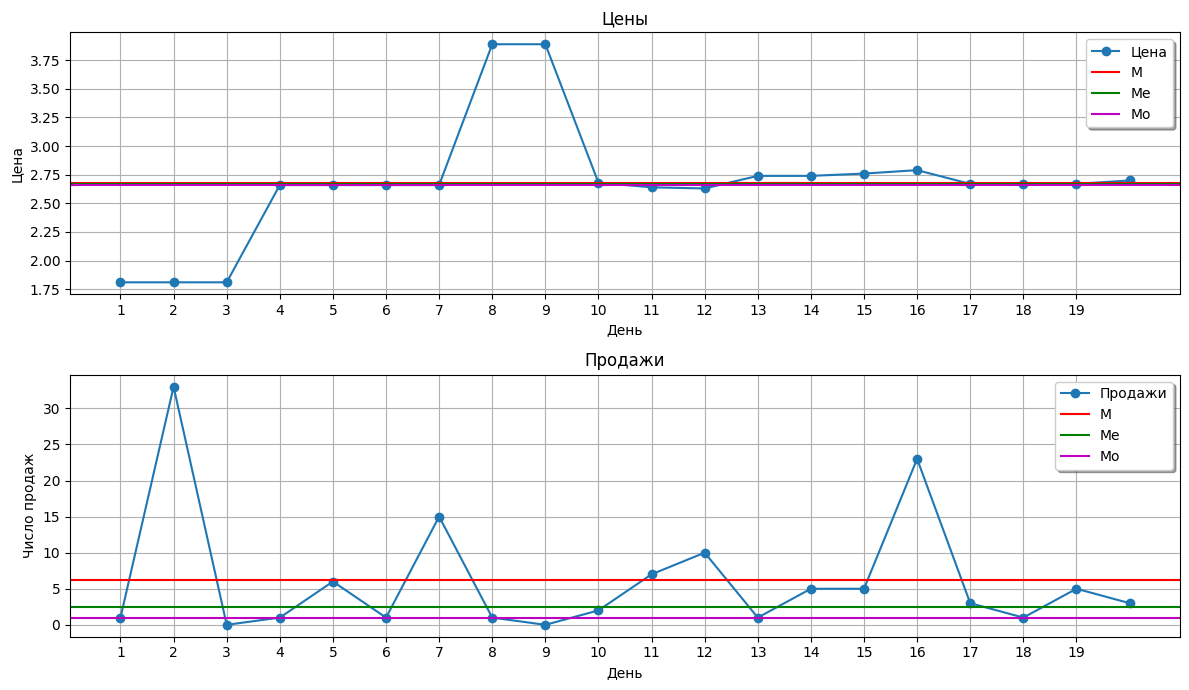

In [27]:
n = len(prices)
prices_sorted = sorted(prices)
sales_sorted = sorted(sales)
M_price = sum(prices) / len(prices)
M_sales = sum(sales) / len(sales)

Me_price = (prices_sorted[n // 2 - 2] + prices_sorted[n // 2 - 1]) / 2
Me_sales = (sales_sorted[n // 2 - 2] + sales_sorted[n // 2 - 1]) / 2

Mo_price = max(prices, key=prices.count)
Mo_sales = max(sales, key=sales.count)
# Отображаем выведенные значения на графике
price_plot.axhline(y=M_price, color='r', label='M')
price_plot.axhline(y=Me_price, color='g', label='Me')
price_plot.axhline(y=Mo_price, color='m', label='Mo')

sales_plot.axhline(y=M_sales, color='r', label='M')
sales_plot.axhline(y=Me_sales, color='g', label='Me')
sales_plot.axhline(y=Mo_sales, color='m', label='Mo')

price_plot.legend(fontsize=10, shadow=True)
sales_plot.legend(fontsize=10, shadow=True)
fig.tight_layout()
fig

Считаем среднее геометрическое, гармоническое значение, дисперсию и среднеквадратичное отклонение для цен и продаж

In [28]:
avg_geom_price = 1
for price in prices:
    avg_geom_price *= price
avg_geom_price = avg_geom_price ** (1 / n)

avg_geom_sale = 1
for sale in sales:
    avg_geom_sale *= sale
avg_geom_sale = avg_geom_sale ** (1 / n)

# Гармоничные значения
try:
    har_sum = 0
    for price in prices:
        har_sum += 1 / price
    har_price = n / har_sum
except:
    har_price = None

try:
    har_sum = 0
    for sale in sales:
        har_sum += 1 / sale
    har_sale = n / har_sum
except:
    har_sale = None

# Дисперсия
D_sum = 0
for price in prices:
    D_sum += (M_price - price) ** 2
D_price = D_sum / n

D_sum = 0
for sale in sales:
    D_sum += (M_sales - sale) ** 2
D_sale = D_sum / n

# Среднеквадратичное отклонение
SD_price = sqrt(D_price)
SD_sale = sqrt(D_sale)
print('Цена:')
print(f'Среднее геометрическое: {avg_geom_price}\n'
      f'Гармоническое значение: {har_price}\n'
      f'Дисперсия: {D_price}\n'
      f'Среднее квадратичное отклонение: {SD_price}\n')

print('Продажи:')
print(f'Среднее геометрическое: {avg_geom_sale}\n'
      f'Гармоническое значение: {har_sale}\n'
      f'Дисперсия: {D_sale}\n'
      f'Среднее квадратичное отклонение: {SD_sale}\n')

Цена:
Среднее геометрическое: 2.628774874145723
Гармоническое значение: 2.5799321724081032
Дисперсия: 0.26154099999999997
Среднее квадратичное отклонение: 0.5114107937851918

Продажи:
Среднее геометрическое: 0.0
Гармоническое значение: None
Дисперсия: 68.7275
Среднее квадратичное отклонение: 8.290205063808736


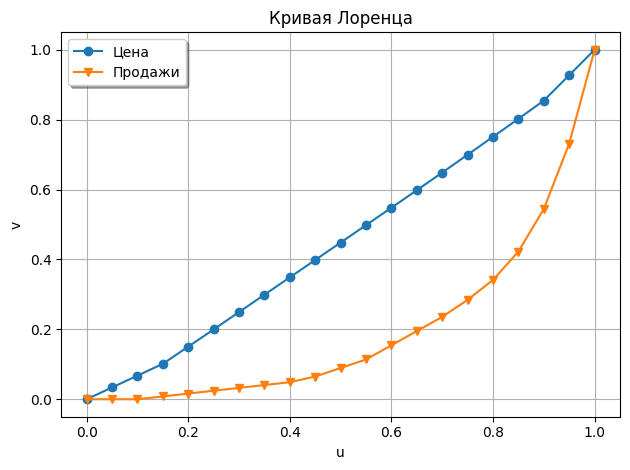

In [29]:
# Строим кривую Лоренца
u = [0]
v_price = [0]
v_sale = [0]

for j in range(1, 21):
    u.append(j / n)
    v_price.append(sum(sorted(prices)[:j]) / sum(prices))
    v_sale.append((sum(sorted(sales)[:j])) / sum(sales))

plt.plot(u, v_price, marker='o', label='Цена')
plt.plot(u, v_sale, marker='v', label='Продажи')

plt.xlabel('u')
plt.ylabel('v')
plt.title('Кривая Лоренца')
plt.grid()

plt.legend(fontsize=10, shadow=True)
plt.tight_layout()
plt.show()

Считаем значение коэффициента Джинни и индекса Херфиндаля

In [30]:
G_price = ((2 * sum([(i + 1) * prices[i] for i in range(n)])) / (
            n * sum(prices))) - ((n + 1) / n)
H_price = sum([(price / sum(prices)) ** 2 for price in prices])

G_sale = ((2 * sum([dates[i] * sales[i] for i in range(n)])) / (
        n * sum(sales))) - ((n + 1) / n)
H_sale = sum([(sale / sum(sales)) ** 2 for sale in sales])

print('Цена:')
print(f'Коэффициент Джинни: {G_price}\n'
      f'Индекс Херфиндаля: {H_price}\n')

print('Продажи:')
print(f'Коэффициент Джинни: {G_sale}\n'
      f'Индекс Херфиндаля: {H_sale}\n')

Цена:
Коэффициент Джинни: 0.035375420246544165
Индекс Херфиндаля: 0.051824790628507277

Продажи:
Коэффициент Джинни: -0.08495934959349594
Индекс Херфиндаля: 0.14085531099213433
